<a href="https://colab.research.google.com/github/Nayoung-young/kaggle_practice/blob/main/Clothes_Size_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clothes-size-prediction 


*   출처: https://www.kaggle.com/tourist55/clothessizeprediction 



## 1. 데이터 전처리 
(8/10)

* 파일 업로드, 데이터 확인 
* data -> size_input, size_target으로 분리

(8/26) 
* Z-score로 Outlier 조정 
* XL 데이터 dropna (삭제) -> 최종 전처리 후: new_data_2


#### a. 데이터 업로드

In [1]:
from google.colab import files 
myfile = files.upload()

Saving clothes-size-prediction.csv to clothes-size-prediction.csv


In [2]:
import io 
import pandas as pd 

In [3]:
data = pd.read_csv(io.BytesIO(myfile['clothes-size-prediction.csv']))

#### b. 데이터 분포 확인

In [4]:
data.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [5]:
data.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [7]:
print(pd.unique(data['size']))
# size 몇 가지 있는지 확인

['XL' 'L' 'M' 'S' 'XXS' 'XXXL' 'XXL']


In [8]:
# Number of occurences for each size (target variable)
# https://www.kaggle.com/sharomeethan/clothing-size-predictor 
data["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

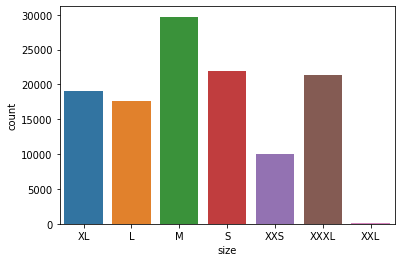

In [9]:
# Number of occurences for each size (target variable)
import seaborn as sns 
sns.countplot(x=data["size"])

Size M이 가장 common 

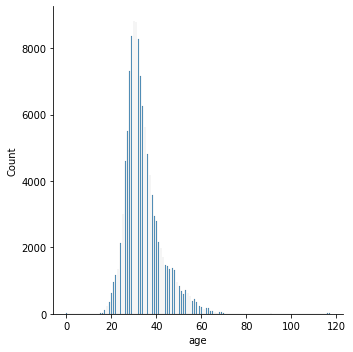

In [10]:
# Age distribution 
sns.displot(data["age"])

age는 주로 25~ 35세 사이 

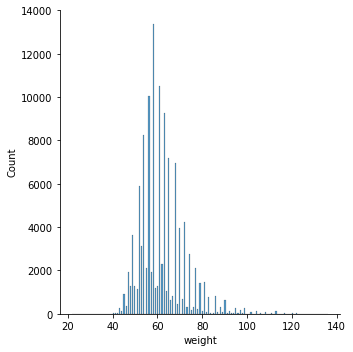

In [11]:
# Weight distribution
sns.displot(data["weight"])

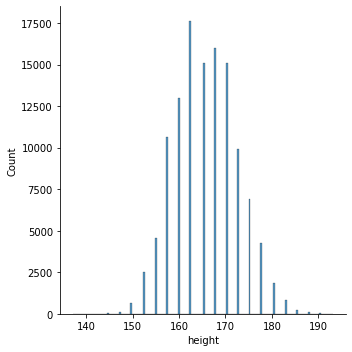

In [12]:
# height distribution
sns.displot(data["height"])

Weight, height는 정규분포에 가까움 

#### c. Removing Outliers 
**Outliers are extreme values that fall a long way outside of the other observations.** ... The process of identifying outliers has many names in data mining and machine learning such as outlier mining, outlier modeling and novelty detection and anomaly detection.

참고한 cell: https://www.kaggle.com/sharomeethan/clothing-size-predictor?scriptVersionId=68507616&cellId=18 
https://www.kaggle.com/nandalald/cloth-size-prediction-94-accuracy?scriptVersionId=68386622&cellId=13

In [176]:
# Outlier Removal Z-score 
# Outlier(사이즈)를 삭제(na로 변경?)하기 위한 근거로 각각의 Z-score를 계산하는 과정
dfs = []
sizes = []
info = {'mean': [], 'std': [], 'size': []} #딕셔너리로 해서 이따가 dataframe으로 만들 것임! 

loop_n = 0 
for size_type in data['size'].unique(): 
  print(loop_n, size_type)
  sizes.append(size_type) # sizes = [XL, L, M, S, XXS, XXXL, XXL]
  ndf = data[['age', 'height', 'weight']][data['size'] == size_type] # 각 size_type에 맞는 행을 data에서 모두 뽑아내고,
  zscore = ((ndf - ndf.mean()) / ndf.std()) # 이때 ndf는 판다스 데이터프레임 형태 (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

  info['size'].append(size_type)
  info['mean'].append(ndf.mean())
  info['std'].append(ndf.std())

  dfs.append(zscore)
  loop_n += 1 

dfs
# dfs는 각 사이즈에 해당하는 모든 age, weight, height 값의 z-score를 담고 있는 리스트 

0 XL
1 L
2 M
3 S
4 XXS
5 XXXL
6 XXL


[             age    height    weight
 0      -0.833326  0.767729 -0.660757
 24     -0.713290  1.539527  1.556338
 25     -0.353183 -1.161765 -0.291241
 28     -0.473219 -1.933562 -1.399788
 34      0.126960 -0.775866  0.447791
 ...          ...       ...       ...
 119705 -0.473219 -0.004068  0.817307
 119719  0.607102 -0.004068  0.447791
 119726 -0.113112  1.153628  0.447791
 119732 -0.473219 -0.004068  1.556338
 119733 -0.593254 -0.004068  0.817307
 
 [19119 rows x 3 columns],              age    height    weight
 1       0.221348  0.106734 -0.704865
 3      -0.896496  1.277532  0.596214
 12     -1.020701 -0.283532  0.379367
 14     -0.151267 -0.283532  0.596214
 15     -0.523881  0.106734  0.162521
 ...          ...       ...       ...
 119708 -0.275472 -1.064064  3.632064
 119711 -0.275472  0.497000  0.596214
 119712  0.097143 -1.064064 -0.271172
 119714  0.718167 -1.454331 -1.355404
 119718 -1.517520 -0.283532 -0.054326
 
 [17587 rows x 3 columns],              age    height    w

In [173]:
# test
info = {'size': [], 'mean': [], 'std': []}
info['size'].append('XL')
info['size']

['XL']

In [177]:
info_df = pd.DataFrame(data = info)
info_df

,mean,std,size
0,age 34.942317 height 167.666779 weig...,age 8.330858 height 6.582037 weight ...,XL
1,age 34.217882 height 166.945336 weig...,age 8.051218 height 6.508380 weight ...,L
2,age 33.451430 height 165.495081 weig...,age 7.704829 height 6.293141 weight ...,M
3,age 32.617881 height 163.763812 weig...,age 7.465664 height 6.212919 weight ...,S
4,age 31.613536 height 161.323778 weig...,age 7.092894 height 5.658672 weight ...,XXS
5,age 36.417660 height 167.837567 weig...,age 9.028235 height 6.989156 weight...,XXXL
6,age 36.304348 height 160.388116 weig...,age 9.954757 height 7.068046 weight ...,XXL


In [178]:
# removing Outliers 
# Z-score가 너무 크거나 작은 값을 조정(?)
for i in range(len(dfs)): 
  #print(sizes[i])
  dfs[i]['age'] = dfs[i]['age'][(dfs[i]['age'] > -3) & (dfs[i]['age'] < 3)]
  dfs[i]['height'] = dfs[i]['height'][(dfs[i]['height'] > -3) & (dfs[i]['height'] < 3)]
  dfs[i]['weight'] = dfs[i]['weight'][(dfs[i]['weight'] > -3) & (dfs[i]['weight'] < 3)]

In [179]:
# 현재 dfs에 size 열이 없는 상태이므로, 추가 
for i in range(len(sizes)):
  dfs[i]['size'] = sizes[i]

In [180]:
dfs[0].head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [181]:
# for test 
print(len(dfs))
print(type(dfs))
print(type(ndf))

dfs[0]['age']

7
<class 'list'>
<class 'pandas.core.frame.DataFrame'>


0        -0.833326
24       -0.713290
25       -0.353183
28       -0.473219
34        0.126960
            ...   
119705   -0.473219
119719    0.607102
119726   -0.113112
119732   -0.473219
119733   -0.593254
Name: age, Length: 19119, dtype: float64

In [182]:
# dfs를 pandas 데이터 프레임으로 바꿔주기
print('기존 dfs의 데이터타입:', type(dfs)) 
print('---------------------------------------')
print('              <new_data>               ')
new_data = pd.concat(dfs)
print(new_data.head())
print('새로 만든 new_data의 데이터타입:', type(new_data))
print('---------------------------------------')

기존 dfs의 데이터타입: <class 'list'>
---------------------------------------
              <new_data>               
         age    height    weight size
0  -0.833326  0.767729 -0.660757   XL
24 -0.713290  1.539527  1.556338   XL
25 -0.353183 -1.161765 -0.291241   XL
28 -0.473219 -1.933562 -1.399788   XL
34  0.126960 -0.775866  0.447791   XL
새로 만든 new_data의 데이터타입: <class 'pandas.core.frame.DataFrame'>
---------------------------------------


Outlier(즉, Z-score >3 또는 <-3인 값)이 없는 것을 확인

In [183]:
new_data['age'][new_data['age'] < -3]

Series([], Name: age, dtype: float64)

#### c-2. Outlier 처리 전 data와 Outlier 처리 후 new_data의 분포 비교 

In [ ]:
sns.displot(data["weight"][data["size"] == 'XL'])

NameError: ignored

In [ ]:
sns.displot(new_data["weight"][data["size"] == 'XL'])

In [ ]:
print(data.describe())
print(new_data.describe())
# 각 값이

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(data = data, hue='size', height = 7)
plt.show()

In [ ]:
sns.pairplot(data = new_data, hue='size', height = 7)
plt.show()

#### d. Removing XXL size because of less count and dropna



In [184]:
import pandas as pd
import numpy as np

In [185]:
print(new_data['size'].value_counts())
print(data['size'].value_counts())

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64
M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64


In [186]:
new_data_2 = new_data[new_data['size'] != 'XXL'].copy()

In [187]:
new_data_2.dropna(how='any', inplace=True)

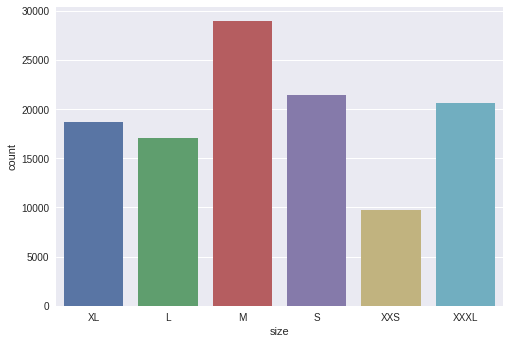

In [188]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.countplot(x = new_data_2['size'])
plt.show()

In [189]:
new_data_2['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL'], dtype=object)

In [190]:
# Outlier 처리 전 기존 data
data.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [191]:
# Outlier 처리 후 new_data
new_data.isna().sum()

age       1678
height     547
weight    1069
size         0
dtype: int64

In [192]:
new_data_2.isna().sum()

age       0
height    0
weight    0
size      0
dtype: int64

## 2. Splitting and training (전처리한 상태에서)

In [80]:
# size 그대로 사용 X, size_code 부여 
# https://www.kaggle.com/nandalald/cloth-size-prediction-94-accuracy?scriptVersionId=68386622&cellId=33 
size_code = {
    'XL':0,
    'L':1,
    'M':2,
    'S':3,
    'XXS':4,
    'XXXL':5
}
new_data_2['size'].replace(size_code, inplace=True)

In [81]:
new_data_2['size'].value_counts()

2    28934
3    21383
5    20654
0    18674
1    17075
4     9700
Name: size, dtype: int64

In [82]:
new_data_2.head()

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,0
24,-0.713290,1.539527,1.556338,0
25,-0.353183,-1.161765,-0.291241,0
28,-0.473219,-1.933562,-1.399788,0
34,0.126960,-0.775866,0.447791,0


In [83]:
# size를 타깃 열로 설정, 나머지 3개 열은 입력 데이터로 사용 
size_input = new_data_2[['weight', 'age', 'height']].to_numpy()

In [84]:
print(size_input[:5])

[[-0.66075668 -0.83332551  0.76772906]
 [ 1.55633826 -0.71328986  1.53952659]
 [-0.29124086 -0.35318291 -1.16176479]
 [-1.39978833 -0.47321856 -1.93356233]
 [ 0.44779079  0.1269597  -0.77586602]]


In [85]:
size_target = new_data_2['size'].to_numpy()

In [86]:
print(size_target.shape)

(116420,)


In [87]:
from sklearn.model_selection import train_test_split 
train_input, test_input, train_target, test_target = train_test_split(
    size_input, size_target, test_size=0.25
)

In [88]:
print(train_input.shape, test_input.shape)
print(train_input[:5])

(87315, 3) (29105, 3)
[[-0.02592229 -0.21670959 -0.19375946]
 [-0.46803001  0.28602935  1.06199274]
 [ 0.66213211 -0.05859054  0.74444844]
 [-1.25339599 -0.08276303 -0.60258501]
 [ 0.44779079 -0.71328986 -0.38996725]]


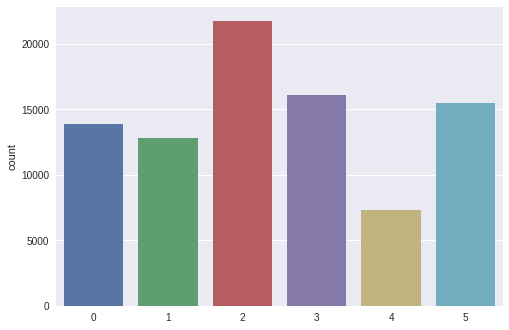

In [89]:
sns.countplot(x= train_target)
plt.show()

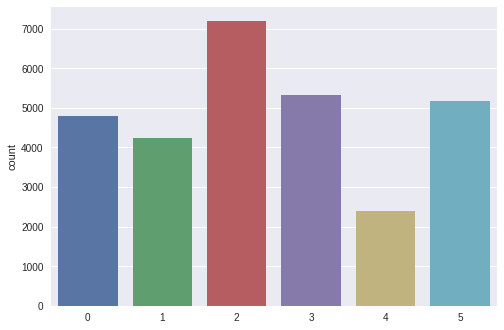

In [90]:
sns.countplot(x= test_target)
plt.show()

## 2-1. Splitting and Training (전처리 전 값으로) 
* 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않는다 (p233) 
* info_df에 저장해둔 각 사이즈의 mean, std로 원래 값으로 돌려놓자! 

In [194]:
index_XXL = info_df[info_df['size'] == 'XXL'].index
info_df = info_df.drop(index_XXL)

In [195]:
new_data_2.head() 
# 얘를 다시 원래 값으로 돌려놓을 것임

,age,height,weight,size
0,-0.833326,0.767729,-0.660757,XL
24,-0.713290,1.539527,1.556338,XL
25,-0.353183,-1.161765,-0.291241,XL
28,-0.473219,-1.933562,-1.399788,XL
34,0.126960,-0.775866,0.447791,XL


In [206]:
raws = []
sizes = []

for i in info_df['size']:
  print(i)
  sizes.append(i)
  zscore = new_data_2[['age', 'height', 'weight']][new_data_2['size'] == i]

  mean_s = str(info_df[info_df['size'] == i]['mean'].tolist())[1:-2].split()
  mean = np.array([[float(mean_s[1]), float(mean_s[3]), float(mean_s[5])]])
  
  std_s = str(info_df[info_df['size'] == i]['std'].tolist())[1:-2].split()
  std = np.array([[float(std_s[1]), float(std_s[3]), float(std_s[5])]])

  raw_data = zscore * std + mean
  raws.append(raw_data)

raws

XL
L
M
S
XXS
XXXL


[              age  height  weight
 0       28.000001  172.72    62.0
 24      29.000000  177.80    74.0
 25      32.000000  160.02    64.0
 28      31.000000  154.94    58.0
 34      36.000000  162.56    68.0
 ...           ...     ...     ...
 119705  31.000000  167.64    70.0
 119719  40.000000  167.64    68.0
 119726  34.000000  175.26    68.0
 119732  31.000000  167.64    74.0
 119733  30.000000  167.64    70.0
 
 [18674 rows x 3 columns],               age      height     weight
 1       36.000000  167.640000  59.000000
 3       27.000000  175.259999  65.000000
 12      26.000000  165.100000  64.000000
 14      33.000000  165.100000  65.000000
 15      30.000000  167.640000  63.000000
 ...           ...         ...        ...
 119697  35.000000  162.560000  61.000000
 119711  32.000000  170.180000  65.000000
 119712  35.000000  160.020000  61.000000
 119714  40.000000  157.480000  55.999999
 119718  21.999999  165.100000  62.000000
 
 [17075 rows x 3 columns],          age      h

In [212]:
# 현재 dfs에 size 열이 없는 상태이므로, 추가 
for i in range(len(sizes)):
  raws[i]['size'] = sizes[i]

In [213]:
raws

[              age  height  weight size
 0       28.000001  172.72    62.0   XL
 24      29.000000  177.80    74.0   XL
 25      32.000000  160.02    64.0   XL
 28      31.000000  154.94    58.0   XL
 34      36.000000  162.56    68.0   XL
 ...           ...     ...     ...  ...
 119705  31.000000  167.64    70.0   XL
 119719  40.000000  167.64    68.0   XL
 119726  34.000000  175.26    68.0   XL
 119732  31.000000  167.64    74.0   XL
 119733  30.000000  167.64    70.0   XL
 
 [18674 rows x 4 columns],               age      height     weight size
 1       36.000000  167.640000  59.000000    L
 3       27.000000  175.259999  65.000000    L
 12      26.000000  165.100000  64.000000    L
 14      33.000000  165.100000  65.000000    L
 15      30.000000  167.640000  63.000000    L
 ...           ...         ...        ...  ...
 119697  35.000000  162.560000  61.000000    L
 119711  32.000000  170.180000  65.000000    L
 119712  35.000000  160.020000  61.000000    L
 119714  40.000000  15

In [215]:
new_raws = pd.concat(raws)
print(new_raws)

              age      height     weight  size
0       28.000001  172.720000  62.000000    XL
24      29.000000  177.800000  74.000000    XL
25      32.000000  160.020000  64.000000    XL
28      31.000000  154.940000  58.000000    XL
34      36.000000  162.560000  68.000000    XL
...           ...         ...        ...   ...
119710  51.000000  165.099999  77.000000  XXXL
119716  28.000000  175.260000  91.000001  XXXL
119720  35.000000  167.640000  58.000000  XXXL
119721  40.000000  160.019999  62.000000  XXXL
119727  28.000000  170.180000  68.000000  XXXL

[116420 rows x 4 columns]


In [216]:
# size를 타깃 열로 설정, 나머지 3개 열은 입력 데이터로 사용 
size_input_raw = new_raws[['weight', 'age', 'height']].to_numpy()
size_target_raw = new_raws['size'].to_numpy()

from sklearn.model_selection import train_test_split 
train_input_raw, test_input_raw, train_target_raw, test_target_raw = train_test_split(
    size_input_raw, size_target_raw, test_size=0.25
)

## 2. 여러 가지 모델 사용해보기 
(8/18)


* 로지스틱 회귀 
* 결정 트리 
* 앙상블

{8/26)
* 전처리 다시 해서 재시도 => 성능 개높아짐 (로지스틱 회귀 빼고)

###로지스틱 회귀
- 확률적 경사 하강법 (p208)하려고 하니 dataconversionwarning: target 형태가 2차원이라서 그런 듯 -> 내가 to_numpy 변환을 2차원으로 했었다 (수정함)
- p224로 retry

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.24796426730802268
0.2502319189142759


In [ ]:
print(lr.coef_, lr.intercept_)

[[ 0.0183965   0.00220825 -0.00573429]
 [ 0.00874814  0.00507467  0.0050528 ]
 [ 0.01113646  0.00040258 -0.0025414 ]
 [ 0.01221292 -0.01118225 -0.00310527]
 [-0.00440674 -0.01389741 -0.00521592]
 [-0.04608727  0.01739416  0.01154408]] [ 0.01593559 -0.07389359  0.44744157  0.14294312 -0.64439691  0.11197022]



### 결정 트리 (raw로 다시) 

In [217]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input_raw, train_target_raw)
print(dt.score(train_input_raw, train_target_raw))
print(dt.score(test_input_raw, test_target_raw))

0.5930138006069976
0.5088129187424841


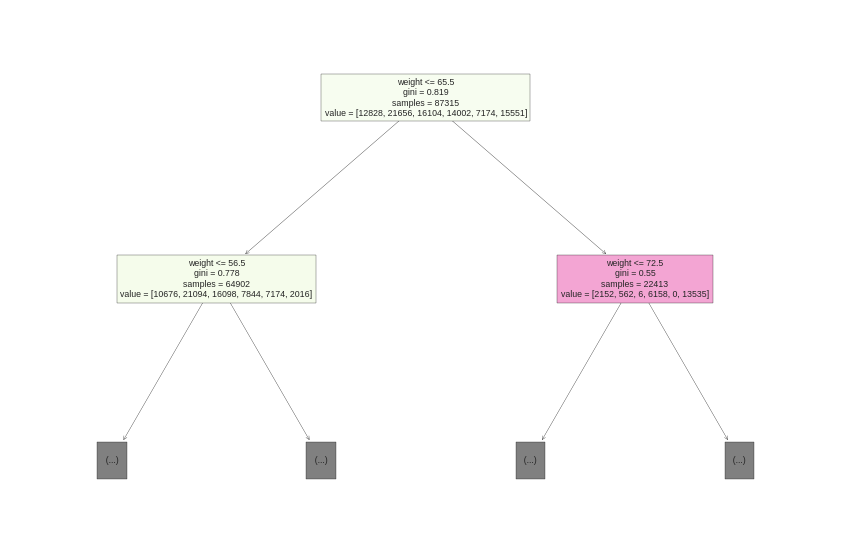

In [220]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 10))
plot_tree(dt, max_depth = 1, filled=True, feature_names = ['weight', 'age', 'height'])
plt.show()

### 앙상블 

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(n_jobs=-1)

scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs = -1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.9982019126152437
